# Loading library

In [354]:
#import liberaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read Dataset

In [355]:
#Load Dataset
df=pd.read_csv("Test_set.csv")
df.head()

,Week commencing,Date,Weekly Volume
0,WC_03-Jul-17,3-Jul-17,255543
1,WC_10-Jul-17,10-Jul-17,304616
2,WC_17-Jul-17,17-Jul-17,297383
3,WC_24-Jul-17,24-Jul-17,297527
4,WC_31-Jul-17,31-Jul-17,306099


In [356]:
df=df.drop(columns='Week commencing')


In [357]:
df

,Date,Weekly Volume
0,3-Jul-17,255543
1,10-Jul-17,304616
2,17-Jul-17,297383
3,24-Jul-17,297527
4,31-Jul-17,306099
...,...,...
151,1-Jun-20,154779
152,8-Jun-20,183712
153,15-Jun-20,180967
154,22-Jun-20,206898


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           156 non-null    object
 1   Weekly Volume  156 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.6+ KB


# Finding Outliers

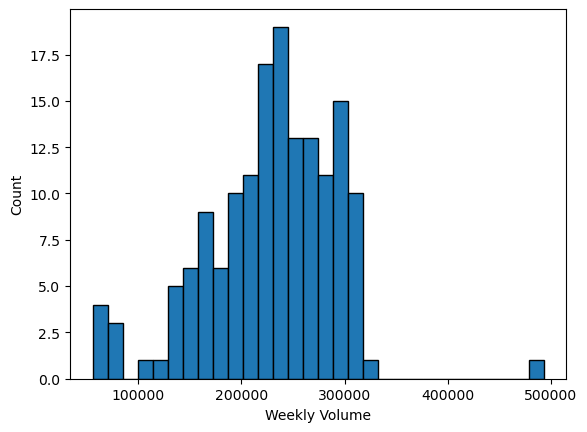

In [359]:
plt.hist(df['Weekly Volume'], bins=30, edgecolor='black')
plt.xlabel('Weekly Volume')
plt.ylabel('Count')
plt.show()

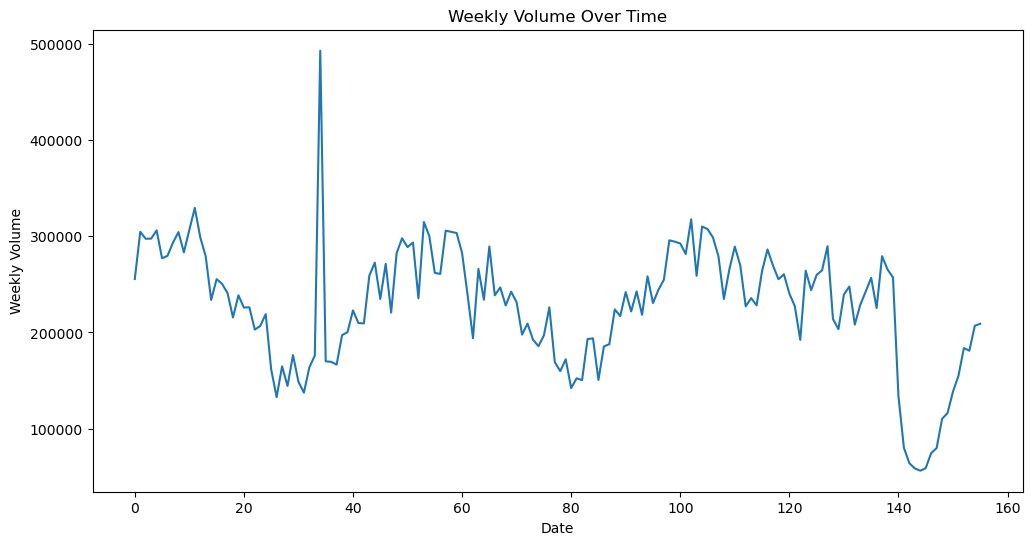

In [360]:
# Plot the time series
df['Weekly Volume'].plot(figsize=(12, 6), title='Weekly Volume Over Time')
plt.ylabel('Weekly Volume')
plt.xlabel('Date')
plt.show()

In [361]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01)
df['anomaly'] = iso_forest.fit_predict(df[['Weekly Volume']])
outliers = df[df['anomaly'] == -1]
print(outliers)

          Date  Weekly Volume  anomaly
34   26-Feb-18         492908       -1
144  13-Apr-20          56176       -1


# Handle Outliers

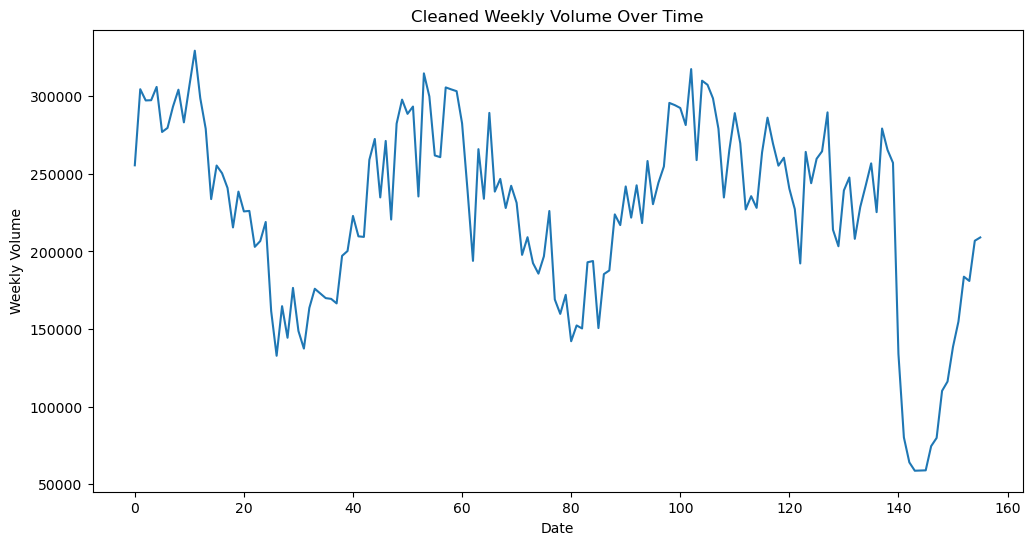

In [362]:
df2= df[df['anomaly'] != -1]

df2['Weekly Volume'].plot(figsize=(12, 6), title='Cleaned Weekly Volume Over Time')
plt.ylabel('Weekly Volume')
plt.xlabel('Date')
plt.show()

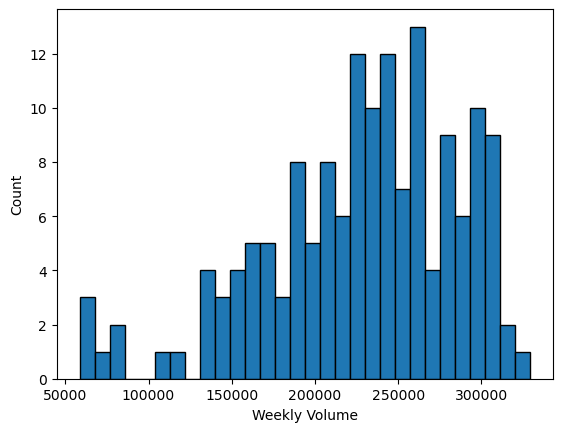

In [363]:
plt.hist(df2['Weekly Volume'], bins=30, edgecolor='black')
plt.xlabel('Weekly Volume')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='Frequency'>

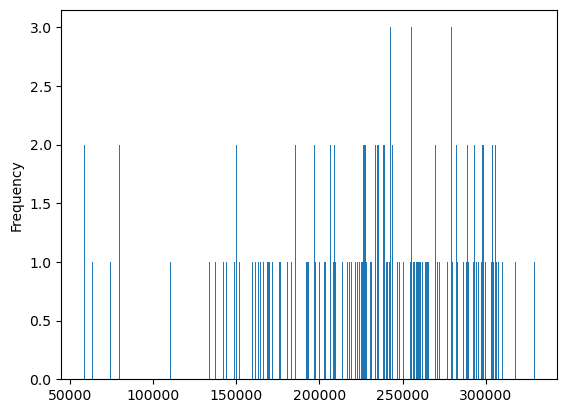

In [364]:
df2['Weekly Volume'].plot(kind='hist', bins=500)

# Convert Dateformate and Set index

In [365]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 0 to 155
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           154 non-null    object
 1   Weekly Volume  154 non-null    int64 
 2   anomaly        154 non-null    int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 4.2+ KB


In [366]:
df2['Date']=pd.to_datetime(df2['Date'])

C:\Users\DELL 3567\AppData\Local\Temp\ipykernel_3816\1678922165.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['Date']=pd.to_datetime(df2['Date'])
C:\Users\DELL 3567\AppData\Local\Temp\ipykernel_3816\1678922165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date']=pd.to_datetime(df2['Date'])


In [367]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 0 to 155
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           154 non-null    datetime64[ns]
 1   Weekly Volume  154 non-null    int64         
 2   anomaly        154 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(1)
memory usage: 4.2 KB


In [368]:
df2.set_index('Date',inplace=True)

In [369]:
df2

,Weekly Volume,anomaly
Date,,
2017-07-03,255543,1
2017-07-10,304616,1
2017-07-17,297383,1
2017-07-24,297527,1
2017-07-31,306099,1
...,...,...
2020-06-01,154779,1
2020-06-08,183712,1
2020-06-15,180967,1


# Trend and seasonality

In [370]:
Weekly_Volume_count=df2['Weekly Volume']
Weekly_Volume_count

Date
2017-07-03    255543
2017-07-10    304616
2017-07-17    297383
2017-07-24    297527
2017-07-31    306099
               ...  
2020-06-01    154779
2020-06-08    183712
2020-06-15    180967
2020-06-22    206898
2020-06-29    209024
Name: Weekly Volume, Length: 154, dtype: int64

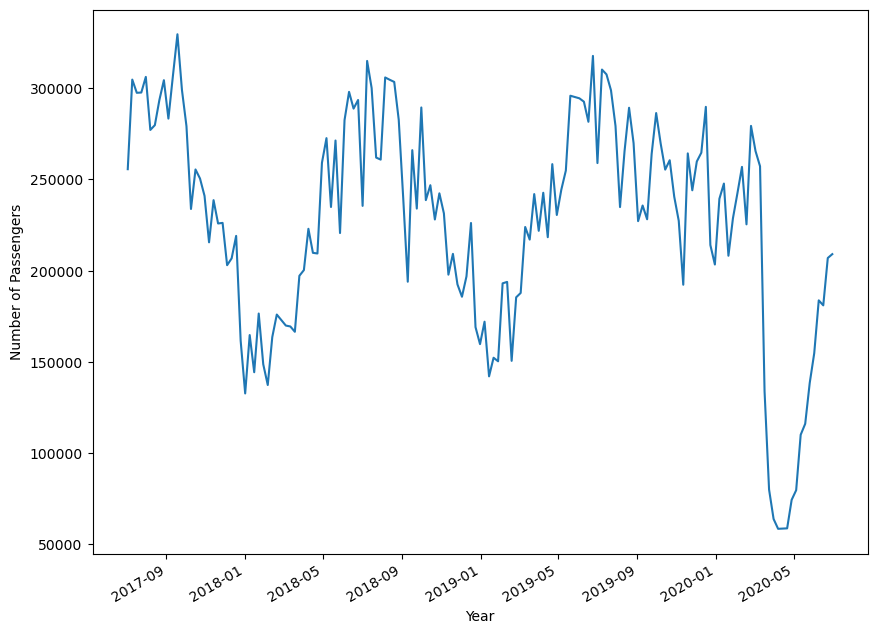

In [371]:
plt.figure(figsize=(10,8))
Weekly_Volume_count.plot()
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

In [372]:
import statsmodels.api as sm
import warnings

In [373]:
decompose=sm.tsa.seasonal_decompose(df2['Weekly Volume'],model='additive', period=52)


Text(0.5, 0.98, 'Decompose Plots')

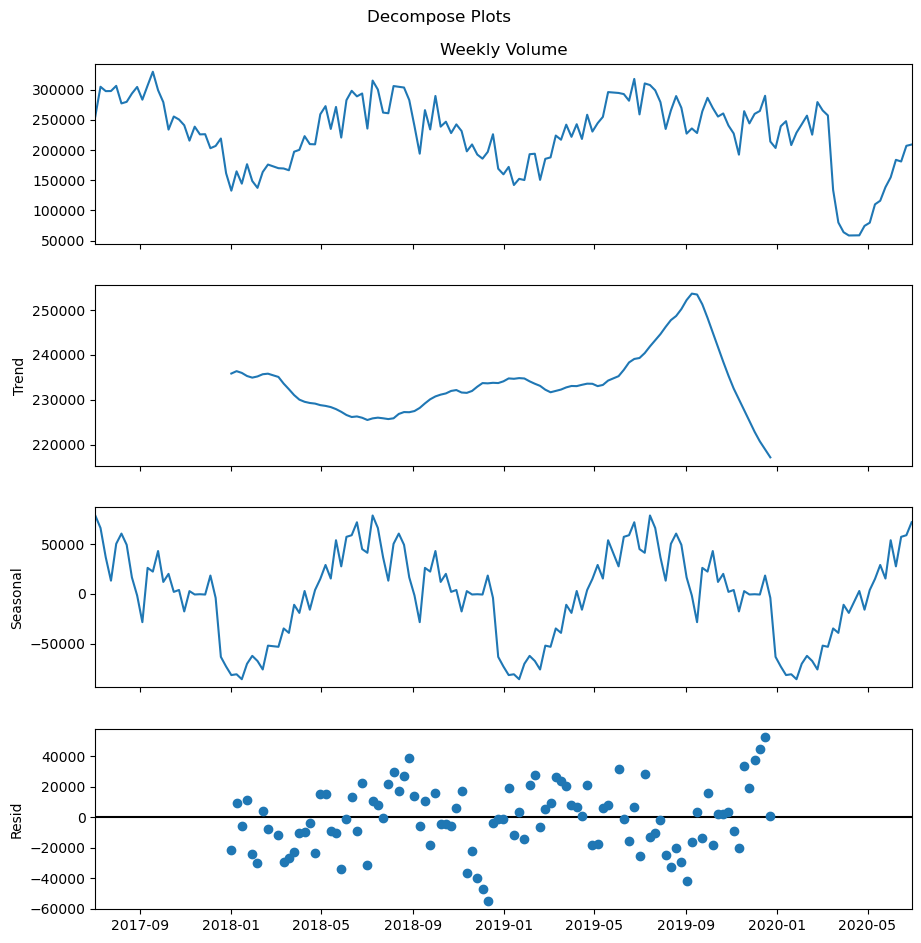

In [374]:
fig=decompose.plot()
fig.set_figheight(10)
fig.set_figwidth(10)
fig.suptitle("Decompose Plots")

Text(0.5, 0.98, 'Decompose Plots')

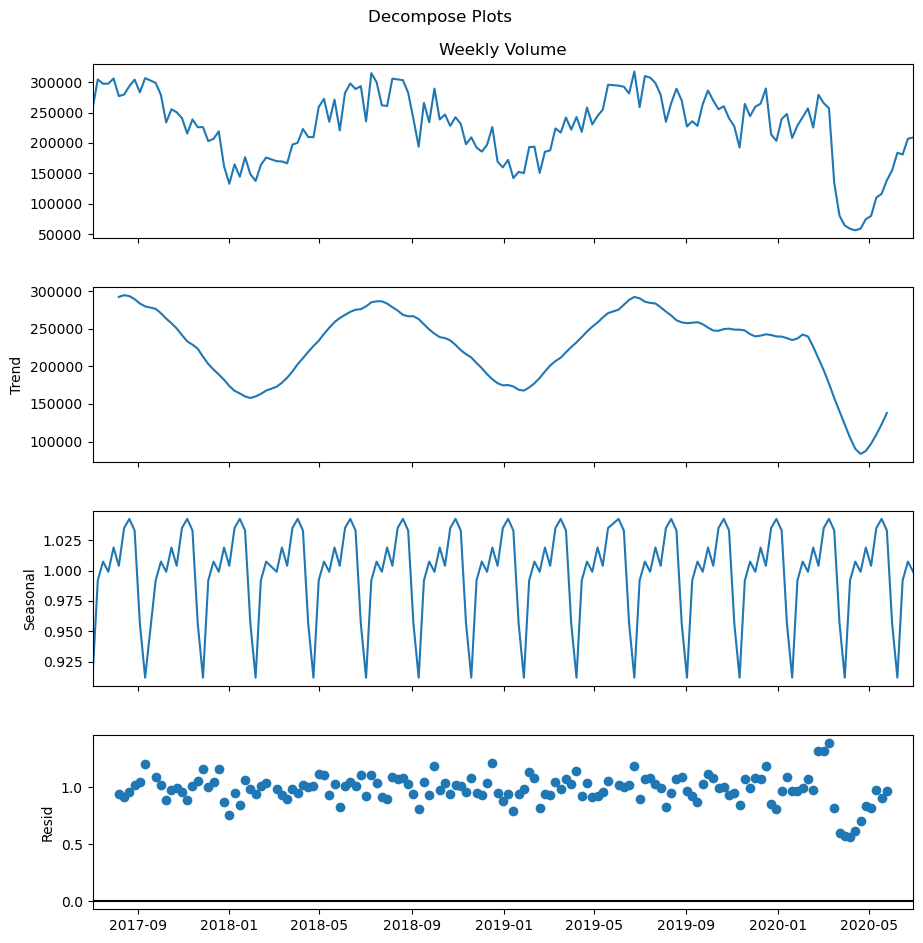

In [268]:
decompose=sm.tsa.seasonal_decompose(df2['Weekly Volume'],model='multiplicative',period=10)
fig=decompose.plot()
fig.set_figheight(10)
fig.set_figwidth(10)
fig.suptitle("Decompose Plots")

# check_stationary

In [375]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [376]:
df2

,Weekly Volume,anomaly
Date,,
2017-07-03,255543,1
2017-07-10,304616,1
2017-07-17,297383,1
2017-07-24,297527,1
2017-07-31,306099,1
...,...,...
2020-06-01,154779,1
2020-06-08,183712,1
2020-06-15,180967,1


In [271]:
# Test for stationarity using Augmented Dickey-Fuller test
result = adfuller(df2['Weekly Volume'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')


df2['Weekly Volume Diff'] = df2['Weekly Volume'].diff().dropna()


result_diff = adfuller(df2['Weekly Volume Diff'].dropna())
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])
for key, value in result_diff[4].items():
    print('Critical Values (Differenced):')
    print(f'   {key}, {value}')

    


ADF Statistic: -2.708177275227856
p-value: 0.07263390107393403
Critical Values:
   1%, -3.474120870218417
Critical Values:
   5%, -2.880749791423677
Critical Values:
   10%, -2.5770126333102494
ADF Statistic (Differenced): -15.727330375717097
p-value (Differenced): 1.3020082679027486e-28
Critical Values (Differenced):
   1%, -3.474120870218417
Critical Values (Differenced):
   5%, -2.880749791423677
Critical Values (Differenced):
   10%, -2.5770126333102494


C:\Users\DELL 3567\AppData\Local\Temp\ipykernel_3816\2138067223.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Weekly Volume Diff'] = df2['Weekly Volume'].diff().dropna()


The original data is non-stationary, but after differencing, the data becomes stationary. 

In [377]:
df2=df2.dropna()

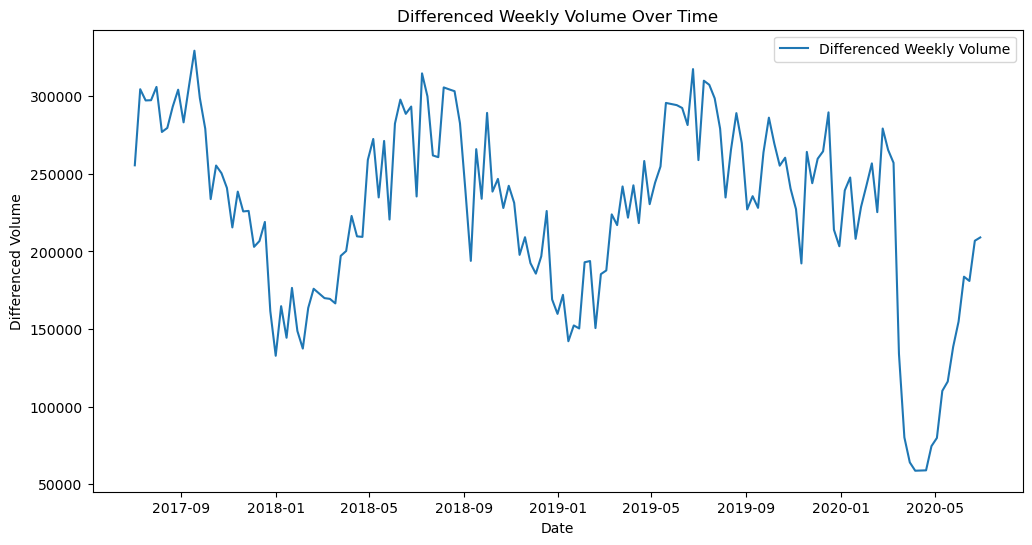

In [378]:
# Visualize the differenced data
plt.figure(figsize=(12,6))
plt.plot(df2.index, df2['Weekly Volume'], label='Differenced Weekly Volume')
plt.title('Differenced Weekly Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Volume')
plt.legend()
plt.show()

# Split Dataset

In [380]:
train_size=int(len(df2)*0.8)
train,test=df2.iloc[:train_size],df2.iloc[train_size:]

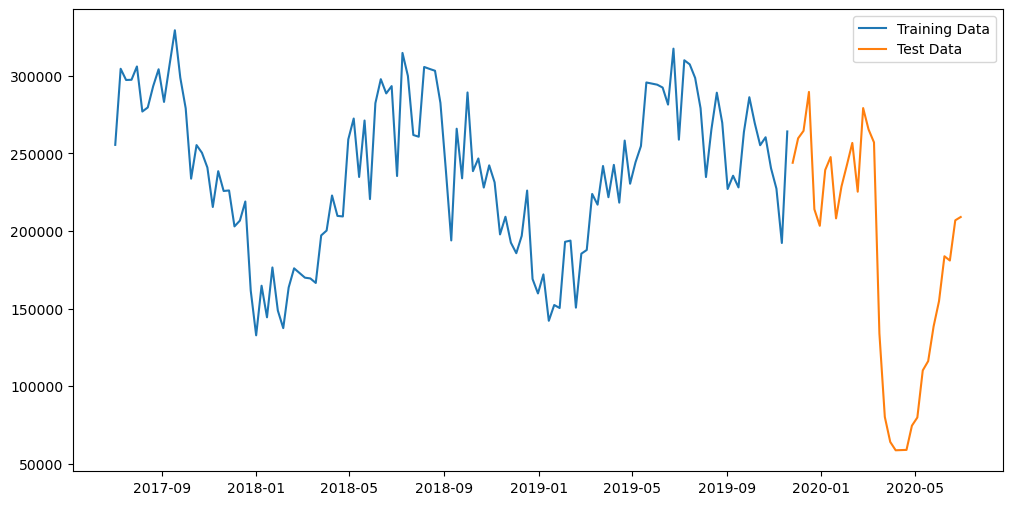

In [383]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Weekly Volume'], label='Training Data')
plt.plot(test.index, test['Weekly Volume'], label='Test Data')
plt.legend()
plt.show()

In [384]:
train.shape,test.shape

((123, 2), (31, 2))

# ARIMA Model

In [385]:
from statsmodels.tsa.arima.model import ARIMA

In [386]:
arima_model = ARIMA(train['Weekly Volume'], order=(5,1,0))
arima_fit = arima_model.fit()
arima_pred = arima_fit.forecast(steps=len(test))


C:\Program Files\Anconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Program Files\Anconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Program Files\Anconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Program Files\Anconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# SARIMA Model

In [387]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [388]:
sarima_model=SARIMAX(train['Weekly Volume'],oder=(1,1,1),seasonal_order=(1,1,1,52))
sarima_model_fit=sarima_model.fit(disp=False)
sarima_pred = arima_fit.forecast(steps=len(test))


C:\Program Files\Anconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Program Files\Anconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Program Files\Anconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['oder']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Program Files\Anconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be 

# XGBOOST Model

In [389]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [390]:
X_train, X_test = np.arange(len(train)).reshape(-1, 1), np.arange(len(train), len(df2)).reshape(-1, 1)
y_train, y_test = train['Weekly Volume'], test['Weekly Volume']


In [391]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [393]:
df2

,Weekly Volume,anomaly
Date,,
2017-07-03,255543,1
2017-07-10,304616,1
2017-07-17,297383,1
2017-07-24,297527,1
2017-07-31,306099,1
...,...,...
2020-06-01,154779,1
2020-06-08,183712,1
2020-06-15,180967,1


# Finding RMSE,MAE,MAPE

In [394]:

def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

arima_rmse, arima_mae, arima_mape = evaluate(test['Weekly Volume'], arima_pred)
sarima_rmse, sarima_mae, sarima_mape = evaluate(test['Weekly Volume'], sarima_pred)
xgb_rmse, xgb_mae, xgb_mape = evaluate(test['Weekly Volume'], xgb_pred)


C:\Users\DELL 3567\AppData\Local\Temp\ipykernel_3816\1664530896.py:4: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
C:\Users\DELL 3567\AppData\Local\Temp\ipykernel_3816\1664530896.py:4: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [395]:
# Print results
print(f"ARIMA: RMSE={arima_rmse}, MAE={arima_mae}, MAPE={arima_mape}")
print(f"SARIMA: RMSE={sarima_rmse}, MAE={sarima_mae}, MAPE={sarima_mape}")
print(f"XGBoost: RMSE={xgb_rmse}, MAE={xgb_mae}, MAPE={xgb_mape}")


ARIMA: RMSE=97981.78506758928, MAE=72633.57808306254, MAPE=nan
SARIMA: RMSE=97981.78506758928, MAE=72633.57808306254, MAPE=nan
XGBoost: RMSE=106527.69086619282, MAE=80350.36088709677, MAPE=82.64622204693643


# Determine the best model

In [396]:
# Determine the best model
if arima_rmse <= sarima_rmse and arima_rmse <= xgb_rmse:
    best_model = "ARIMA"
elif sarima_rmse <= arima_rmse and sarima_rmse <= xgb_rmse:
    best_model = "SARIMA"
else:
    best_model = "XGBoost"

print(f"The best model is: {best_model}")

The best model is: ARIMA


# Probelm Statment - Prediction between Sep 2020 to march 2021

In [399]:
def diff(start, end):
    x = pd.to_datetime(end) - pd.to_datetime(start)
    return int(x / np.timedelta64(1, 'W'))+1

forecast_periods=diff("2020-09-01","2021-03-01")


In [400]:
forecast = arima_fit.forecast(steps=forecast_periods)
forecast


C:\Program Files\Anconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Program Files\Anconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


123    255757.403986
124    255555.579772
125    247821.689415
126    250519.763650
127    251825.048634
128    252075.932664
129    251537.119983
130    251371.686807
131    251480.802044
132    251558.562077
133    251551.703504
134    251523.449568
135    251519.131822
136    251525.754606
137    251529.246232
138    251528.090669
139    251526.757041
140    251526.716539
141    251527.113782
142    251527.236832
143    251527.150884
144    251527.089728
145    251527.098410
146    251527.119480
147    251527.122717
148    251527.117265
Name: predicted_mean, dtype: float64

In [401]:
last_date = df2.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(weeks=1), periods=forecast_periods, freq='W')
forecast_index

DatetimeIndex(['2020-07-12', '2020-07-19', '2020-07-26', '2020-08-02',
               '2020-08-09', '2020-08-16', '2020-08-23', '2020-08-30',
               '2020-09-06', '2020-09-13', '2020-09-20', '2020-09-27',
               '2020-10-04', '2020-10-11', '2020-10-18', '2020-10-25',
               '2020-11-01', '2020-11-08', '2020-11-15', '2020-11-22',
               '2020-11-29', '2020-12-06', '2020-12-13', '2020-12-20',
               '2020-12-27', '2021-01-03'],
              dtype='datetime64[ns]', freq='W-SUN')

In [402]:
type(forecast)

pandas.core.series.Series

In [403]:
type(forecast_index)

pandas.core.indexes.datetimes.DatetimeIndex

In [404]:
Predicted_dataset= pd.DataFrame({'Date': forecast_index, 'Forecast': forecast})
Predicted_dataset

,Date,Forecast
123,2020-07-12,255757.403986
124,2020-07-19,255555.579772
125,2020-07-26,247821.689415
126,2020-08-02,250519.763650
127,2020-08-09,251825.048634
128,2020-08-16,252075.932664
129,2020-08-23,251537.119983
130,2020-08-30,251371.686807
131,2020-09-06,251480.802044
132,2020-09-13,251558.562077


In [405]:
Predicted_dataset.set_index('Date')

,Forecast
Date,
2020-07-12,255757.403986
2020-07-19,255555.579772
2020-07-26,247821.689415
2020-08-02,250519.763650
2020-08-09,251825.048634
2020-08-16,252075.932664
2020-08-23,251537.119983
2020-08-30,251371.686807
2020-09-06,251480.802044


In [406]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 154 entries, 2017-07-03 to 2020-06-29
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Weekly Volume  154 non-null    int64
 1   anomaly        154 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 3.0 KB
